МОДЕЛЮВАНННЯ ПРОГНОЗІВ ПОГОДИ



Виконав: Кубрак Валентин, Група: КМ-03

Для того, щоб прогнозувати погоду з нуля, необхідно подолати досить важкий шлях, починаючи від деяких початкових замірів кліматичних умов, закінчуючи важкими математичними обчисленнями. Наша задача - використовувати вже обчислені дані, шляхом обробки API, що предоставляють різні сайти по прогнозам погоди. Саме для цієї цілі було обрано наступний сайт: https://open-meteo.com. Open-Meteo співпрацює з національними службами погоди, надаючи відкриті дані з роздільною здатністю від 1 до 11 км. Їхні API вибирають найкращі моделі погоди для обраного місця розташування та надають дані у вигляді простого JSON файлу.

Переваги саме цього постачальника API для нашого прогнозу погоди:

Висока роздільна здатність:

Open-Meteo об’єднує глобальні (11 км) і мезомасштабні (1 км) моделі погоди від національних метеорологічних служб в один бездоганний прогноз. Для кожного місця на землі доступне прогнозування погоди. Дані про погоду надаються в погодинній роздільній здатності з прогнозом на 7 днів. Як правило, перші 2-3 дні обчислюються за допомогою локальних моделей погоди з високою роздільною здатністю, а потім глобальні моделі погоди з прогнозом до 16 днів. Ці API бездоганно інтегрують дані, щоб запропонувати простий погодинний прогноз погоди.

Швидкі оновлення:

Щоб постійно коригувати прогноз погоди, локальні моделі оновлюються щогодини. Прогнози Open-Meteo завжди актуальні та фіксують останні зміни на радарах дощу. Погодні моделі використовують вимірювання в реальному часі, дані літаків, буї, радари та супутникові спостереження для числового прогнозу погоди. Завдяки щогодинним оновленням аналіз погоди є кращим за прості станції вимірювання.

Історичні дані за 60 років:

Історичний API погоди Open-Meteo містить понад 60 років погодинних даних про погоду з роздільною здатністю 25 кілометрів. Хоча на основі 20 ТБ даних можна миттєво отримати дані про температуру за 60 років. Крім того, моделі погоди на 1 км постійно архівують дані за останні місяці. Можна легко отримати найновіший прогноз у поєднанні з даними за останні тижні.

Безкоштовні API:

Для некомерційного використання Open-Meteo API можна використовувати безкоштовно без жодного ключа API. Не потрібно реєструватися або використовувати кредитну картку. Єдині обмеження: заборона комерційного використання та обмеження на більше 10000 викликів щодня.

Open-Source: 

Весь код Open-Meteo доступний на GitHub за ліцензією AGPLv3. Можна запустити власний API погоди, зробити внесок і допомогти покращити Open-Meteo! Дані пропонуються за ліцензією Attribution 4.0 International (CC BY 4.0). Можна вільно ділитися та адаптувати навіть для комерційного використання.

Отже, визначимося з тим, які API нам потрібні та які ми будемо використовувати. Почнімо з того, що Open-Meteo надає наступні API: Weather Forecast API, Historical Weather API, ECMWF API, GFS & HRRR Forecast API, MeteoFrance API, DWD API, JMA API, MET Norway API, GEM API. З цієї групи API виділимо наступні: Weather Forecast API - надає дані про погоду, отримані внаслідок поєднання як багатьох глобальних методів, так і локальних для більшої точності прогнозу; Historical Weather API - надає історичні дані про погоду за більше ніж 60 років; Всі інші API - надають дані про погоду, отриману внаслідок обчислень якимось одним методом. Отже, обираємо саме Weather Forecast API та Historical Weather API.

Перейдемо до однієї з найголовніших частин прогнозування погоди - формування API та його обробки. Формування потрібних нам API залежить від того, які змінні нам необхідні для прогнозування погоди. Таким чином визначимось, що ми хочемо бачити в наших прогнозах. Для погодинного прогнозу Open-Meteo надає можливість отримати наступні дані:

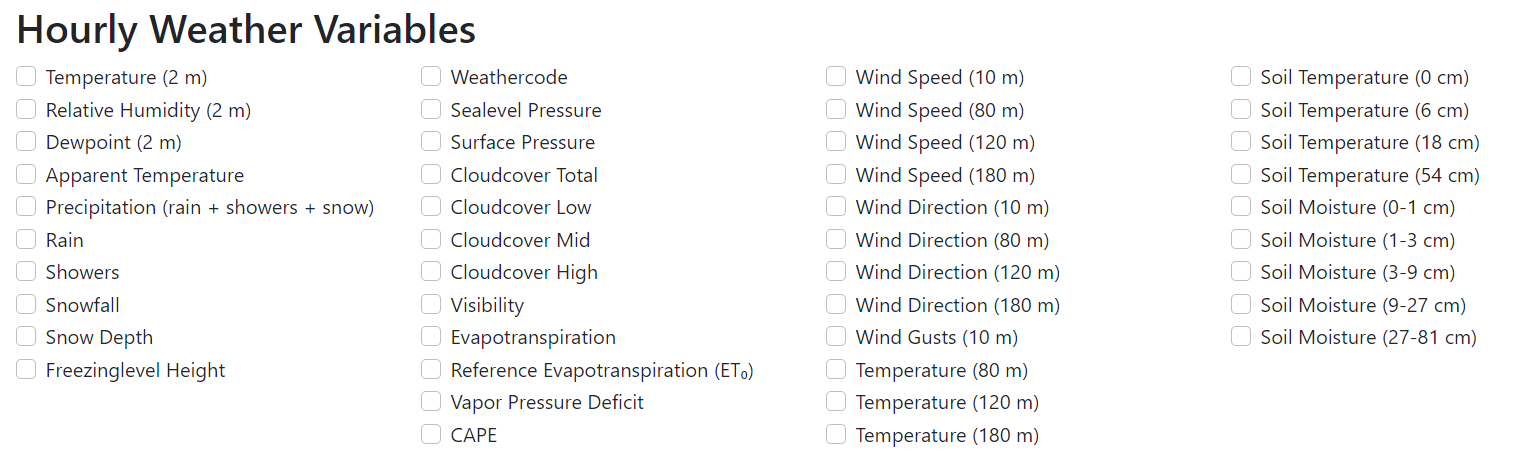

Опис змінних для погодинного прогнозу:

Temperature (2m) - Температура повітря на висоті 2 метри над землею;

Relative Humidity (2m) - Відносна вологість на висоті 2 метри над землею;

Dewpoint (2m) - Температура точки роси на висоті 2 метри над землею;

Apperant Temperture - Видима температура – ​​це температура, яка сприймається на дотик, поєднуючи коефіцієнт холоду вітру, відносну вологість і сонячну радіацію;

Precipitation (rain + showers + snow) - Загальна сума опадів (дощ, злива, сніг) за попередню годину. Дані зберігаються з точністю до 0,1 мм. Якщо дані про опади підсумовувати до місячних сум, можуть бути невеликі розбіжності із загальною кількістю опадів;

Rain - Дощ від великомасштабних погодних систем за попередню годину у міліметрах

Showers - Зливи від конвективних опадів у міліметрах за попередню годину

Snowfall - Snowfall - Кількість снігопадів за попередню годину в сантиметрах. Щоб отримати водний еквівалент у міліметрах, розділіть на 7. Наприклад. 7 см снігу = 10 мм водяного еквівалента опадів;

Snow Depth - Глибина снігу на землі

Freezinglevel Height - Висота над рівнем моря рівня 0°C

Weathercode - Погодні умови як цифровий код. Код погоди розраховується на основі аналізу хмарного покриву, опадів і снігопаду; 

Sealevel Pressure/Surface Pressure - Атмосферний тиск, приведений до середнього рівня моря (м над рівнем моря) або тиску на поверхні. Зазвичай тиск на середній рівень моря використовується в метеорології. Приземний тиск знижується зі збільшенням висоти;

Cloudcover Total - Загальна хмарність як частка площі;

Cloudcover Low - Низька хмарність і туман до висоти 2 км;

Cloudcover Mid - Середня хмарність від 2 до 6 км над рівнем моря;

Cloudcover High - Високі хмари з висоти 6 км;

Visibility - Відстань перегляду в метрах. Вплив низької хмарності, вологості та аерозолів. Максимальна видимість становить приблизно 24 км;

Evapotranspiration - Сумарне випаровування з поверхні землі та рослин, що передбачається погодними моделями для цього місця. Враховується доступна ґрунтова вода. 1 мм евапотранспірації за годину відповідає 1 літру води на запасний метр;

Reference Evapotranspiration (ET₀) - ET₀ Евапотранспірація добре зрошеного трав’яного поля. На основі рівнянь Пенмана-Монтейта FAO-56 ET₀ розраховується на основі температури, швидкості вітру, вологості та сонячної радіації. Передбачається необмежена кількість ґрунтової води. ET₀ зазвичай використовується для оцінки необхідного поливу для рослин;

Vapor Pressure Deficit - Дефіцит тиску пари (ДТП) у кілопаскалях (кПа). За високого VPD (>1,6) транспірація води рослинами збільшується. При низькому VPD (<0,4) транспірація знижується;

CAPE - Конвективна доступна потенційна енергія;

Wind Speed (10/80/120/180 m) - Швидкість вітру на висоті 10, 80, 120 чи 180 метрів над землею. Швидкість вітру на 10 метрах – стандартний рівень;

Wind Direction (10/80/120/180 m) - Напрямок вітру на висоті 10, 80, 120 або 180 метрів над землею;

Wind Gusts (10 m) - Пориви на висоті 10 метрів над землею як максимум за попередню годину;

Soil Temperature (0/6/18/54 cm) - Температура в ґрунті на глибині 0, 6, 18 і 54 см. 0 см — температура поверхні суші або температура поверхні води;

Soil Moisture (0-1 /1-3 /3-9 /9-27 /27-81 cm) - Середній вміст води в ґрунті як об’ємне співвідношення змішування на глибинах 0-1, 1-3, 3-9, 9-27 і 27-81 см.

Змінні для визначення погодинної історії прогнозу майже схожі з попередніми змінними, але є певні відмінності:

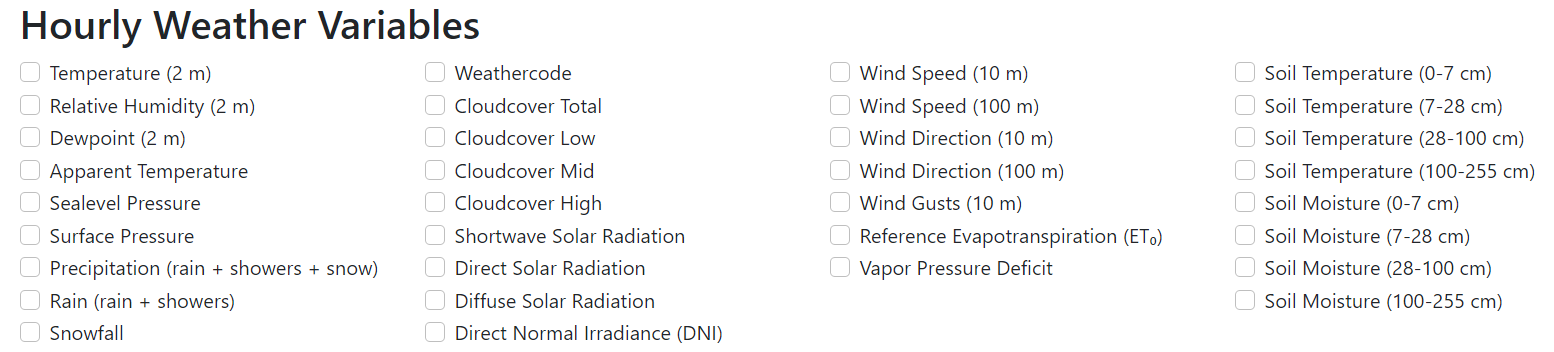

Опис унікальних змінних для погодинної історії прогнозів:

Shortwave Solar Radiation - Короткохвильова сонячна радіація в середньому за попередню годину. Це дорівнює загальному глобальному горизонтальному опроміненню;

Direct Solar Radiation/Direct Normal Irradiance (DNI) - Пряме сонячне випромінювання як середнє за попередню годину на горизонтальній площині та нормальній площині (перпендикулярно сонцю);

Diffuse Solar Radiation - Розсіяна сонячна радіація в середньому за попередню годину.

Отже, для наших погодинних прогнозів оберемо наступні змінні: Temperature, Relative Humidity, Apparent Temperature, Precipitation, Cloudcover Total, Surface Pressure, Wind Speed (10 m), Wind Gusts (10 m), Wind Direction (10 m). Обравши змінні, ми тим самим, можна сказати, сформували потрібний нам API. 

Тепер складемо посилання на API. Скласти його можна одразу на сайті, обравши необхідні змінні, або зібрати вручну.

Основний принцип складання посилання на API:

Береться основа посилання: https: //api. open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}, де latitude - широта, а longitude - довгота. далі через & записується hourly=, де після '=' через кому записуються необхідні нам змінні, далі знову через & обираєтсья timezone=, де після '=' записується відповідний часовий пояс, що підтримується (https://en.wikipedia.org/wiki/List_of_tz_database_time_zones). В кінці посилання на API через & повинні бути записані дата початку прогнозу start_date= та кінця прогнозу end_date= у форматі YYYY-MM-DD.

Для зручності, сформуємо посилання на необхідний нам API на самому сайті. Було отримано наступне посилання:

https: //api. open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,surface_pressure,cloudcover,windspeed_10m,windgusts_10m,
winddirection_10m&windspeed_unit=ms&timezone=Europe%2FKiev&start_date={date}&end_date={date}

де змінні у {} будемо записувати динамічно, відповідно до вимог користувача.

Для історичного погодинного прогнозу погоди візьмемо тіж самі змінні, та також на сайті сформуємо посилання на наш API (але послідовність деяких змінних змінится):

https: //archive-api. open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,
precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&timezone=Europe%2FKiev&
windspeed_unit=ms

Тепер подивимось, які змінні надає сайт для загального добового прогнозу:

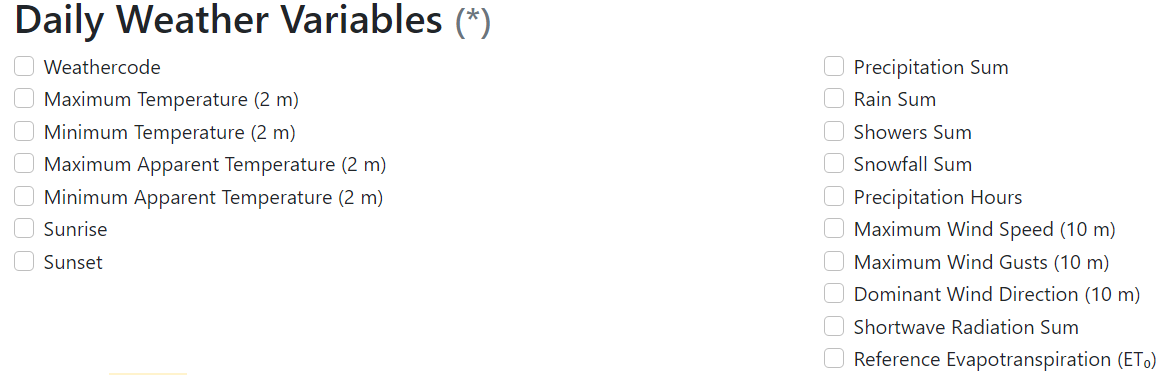

Опис змінних для денного прогнозу:

Weathercode - Найважчі погодні умови в певний день;

Maximum/Minimum Temperature (2 m) - Максимальна та мінімальна добова температура повітря на висоті 2 метри над землею;

Maximum/Minimum Apparent Temperature (2 m) - Максимальна і мінімальна добова видима температура;

Sunrise/Sunset - Час сходу та заходу сонця;

Precipitation Sum - Сума опадів за добу (включаючи дощ, зливи та сніг);

Rain Sum - Сума добових опадів;

Showers Sum - Сума добових злив;

Snowfall Sum - Сума снігопадів за день;

Precipitation Hours - Кількість годин з дощем;

Maximum Wind Speed (10 m)/Maximum Wind Gusts (10 m) - Максимальна швидкість та пориви вітру за добу;

Dominant Wind Direction (10 m) - Переважний напрямок вітру;

Shortwave Radiation Sum - Переважний напрямок вітру;

Reference Evapotranspiration (ET₀) - Добова сума ET₀ Еталонна евапотранспірація добре зрошеного трав’яного поля.

Також переглянимо можливі змінні для перегляду історії добових прогнозів погоди:

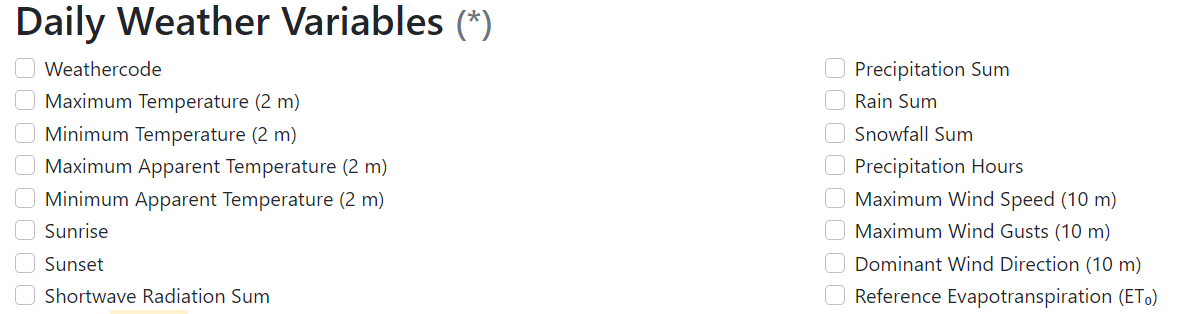

Можна побачити, що змінні повністю ідентичні.

Обравши змінні ми сформували необхідні нам API, тепер на сайті сформуємо посилання на них:

Для денного прогнозування погоди:
https: //api. open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&
daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,
windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&
windspeed_unit=ms&timezone=Europe%2FKiev&start_date={start_date}&end_date={end_date}


Для перегляду історії дених прогнозів погоди:
https: //archive-api. open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&
daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,
windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&
timezone=Europe%2FKiev&windspeed_unit=ms

Отже, тепер приступимо до програмування:

Спершу необхідно імпортувати необхідні модулі:

In [ ]:
import datetime
import requests
import pandas as pd
import warnings
from calendar import monthrange
from pprint import pprint

модуль datetime необхідний для роботи з датами (визначення сьогоднішньої дати, днів тижня і тд.)

модуль requests необхідний для отримання Json файлу з посилання на API

модуль pandas необхідний для роботи з ексель таблицями (необхідно буде виносити певні дані в ексель таблиці)

модуль warnings необхідний для того, щоб ігнорувати певні попереджуючі повідомлення (FutureWarning)

модуль calendar необхідний для роботи з датами, а саме в нашій роботі для визначення кількості днів в місяці.

модуль pprint необхідний для зрозумілого зчитування json файлу.

Також для коректної роботи слід завантажити модулі xlsxwriter та openpyxl (не імпортувати)

Напишемо код для визначення поточної погоди по заданим координатам:

In [ ]:
def current_weather(latitude, longitude):
    try:
        r0 = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&"
            f"hourly=temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,surface_pressure,cloudcover,"
            f"windspeed_10m,windgusts_10m,winddirection_10m&"
            f"windspeed_unit=ms&"
            f"timezone=Europe%2FKiev&"
            f"start_date={datetime.datetime.now().strftime('%Y-%m-%d')}&"
            f"end_date={datetime.datetime.now().strftime('%Y-%m-%d')}")
        data_d0 = r0.json()
        #pprint(data_d0)
        
        time_idx = int()
        current_time = datetime.datetime.now().strftime('%Y-%m-%dT%H:00')
        for t in range(len(data_d0["hourly"]["time"])):
            if data_d0["hourly"]["time"][t] == current_time:
                if int(datetime.datetime.now().strftime('%M')) >= 30:
                    time_idx = t+1
                else:
                    time_idx = t

        temp = data_d0["hourly"]["temperature_2m"][time_idx]
        apparent_temp = data_d0["hourly"]["apparent_temperature"][time_idx]
        humidity = data_d0["hourly"]["relativehumidity_2m"][time_idx]
        precipitation = data_d0["hourly"]["precipitation"][time_idx]
        cloudcover = data_d0["hourly"]["cloudcover"][time_idx]
        pressure_hPa = data_d0["hourly"]["surface_pressure"][time_idx]
        windspeed = data_d0["hourly"]["windspeed_10m"][time_idx]
        windgusts = data_d0["hourly"]["windgusts_10m"][time_idx]
        winddirection = data_d0["hourly"]["winddirection_10m"][time_idx]

        #Перевод тиску з hPa (Гектопаскаль) до мм.рт.ст (міліметрів ртутного стовпа)
        pressure = round(pressure_hPa * 0.75006375541921, 2)

        print(f"Дата: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n"
              f"Температура: {temp}°C (Відчувається як: {apparent_temp}°C)\nВологість: {humidity}%\n"
              f"Кількість опадів: {precipitation}мм\nХмарність: {cloudcover}%\n"
              f"Тиск: {pressure}мм.рт.ст.\nШвидкість вітру: {windspeed}м/c\nПориви вітру: {windgusts}м/c\n"
              f"Напрям вітру: {winddirection}°\n")

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених координатів!")

В цій функції можна побачити, яким чином обробляються API: спершу всі дані записуються в json файл, далі визначаються змінні які нам необхідні і в кінці виводяться. Цей принций буде в кожній наступній функції, де необхідна обробка API.

Далі напишемо функцію, що буде виводити погодинну погоду (кожні 3 години) в обраний день:

In [ ]:
def hourly_weather(latitude, longitude, date):
    try:
        r = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&"
            f"hourly=temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,surface_pressure,cloudcover,"
            f"windspeed_10m,windgusts_10m,winddirection_10m&"
            f"windspeed_unit=ms&"
            f"timezone=Europe%2FKiev&"
            f"start_date={date}&"
            f"end_date={date}")
        data = r.json()
        #pprint(data)

        temp = data["hourly"]["temperature_2m"]
        apparent_temp = data["hourly"]["apparent_temperature"]
        humidity = data["hourly"]["relativehumidity_2m"]
        precipitation = data["hourly"]["precipitation"]
        cloudcover = data["hourly"]["cloudcover"]
        pressure_hPa = data["hourly"]["surface_pressure"]
        windspeed = data["hourly"]["windspeed_10m"]
        windgusts = data["hourly"]["windgusts_10m"]
        winddirection = data["hourly"]["winddirection_10m"]

        pressure = list()
        for i in range(len(pressure_hPa)):
            pressure.append(round(pressure_hPa[i]*0.75006375541921, 2))

        print(f"Дата: {date}")
        for hour in range(len(data["hourly"]["time"])):
            if hour%3==0:
                print(f"Час: {data['hourly']['time'][hour].split('T')[1]}\n"
                      f"Температура: {temp[hour]}°C (Відчувається як: {apparent_temp[hour]}°C)\nВологість: {humidity[hour]}%\n"
                      f"Кількість опадів: {precipitation[hour]}мм\nХмарність: {cloudcover[hour]}%\n"
                      f"Тиск: {pressure[hour]}мм.рт.ст.\nШвидкість вітру: {windspeed[hour]}м/c\nПорив вітру: {windgusts[hour]}м/c\n"
                      f"Напрям вітру: {winddirection[hour]}°\n")

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Якщо замість виводу прогноза погоди кожні 3 години необхідний погодинний прогноз, то слід видалити умову 'if hour%3==0:'

Напишемо функцію для прогноза погоди на протязі неділі:

In [ ]:
def week_weather(latitude, longitude, date):
    #Наступний шматок коду визначає дати понеділка та неділі, в межах яких знаходиться вхідна дата
    try:
        format_date = datetime.datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2]))
        if int(format_date.day) >= datetime.datetime.weekday(format_date):
            diff = str(int(format_date.day)-datetime.datetime.weekday(format_date))
            monday = f"{format_date.year}-{format_date.month}-{diff}"
        else:
            if format_date.month != 1:
                diff = str(int(format_date.day)-datetime.datetime.weekday(format_date)+monthrange(format_date.year, format_date.month-1)[1])
                monday = f"{format_date.year}-{format_date.month-1}-{diff}"
            else:
                diff = str(int(format_date.day)-datetime.datetime.weekday(format_date)+monthrange(format_date.year-1, 12)[1])
                monday = f"{format_date.year-1}-12-{diff}"
        days_to_sunday = 6 - datetime.datetime.weekday(format_date)
        if int(format_date.day)+days_to_sunday <= monthrange(format_date.year, format_date.month)[1]:
            sunday = f"{format_date.year}-{format_date.month}-{int(format_date.day)+days_to_sunday}"
        else:
            if format_date.month != 12:
                sunday = f"{format_date.year}-{format_date.month+1}-{int(format_date.day)+days_to_sunday-monthrange(format_date.year, format_date.month)[1]}"
            else:
                sunday = f"{format_date.year+1}-01-{int(format_date.day)+days_to_sunday-monthrange(format_date.year, format_date.month)[1]}"

        #Відбувається підгін отриманої дати понеділка під формат YYYY-MM-DD
        temp_list = monday.split('-')
        for i in range(len(temp_list)):
            if len(temp_list[i]) <2:
                temp_list[i] = '0' + temp_list[i]
        monday = '-'.join(temp_list)

        #Відбувається підгін отриманої дати неділі під формат YYYY-MM-DD
        temp_list2 = sunday.split('-')
        for i in range(len(temp_list2)):
            if len(temp_list2[i]) < 2:
                temp_list2[i] = '0' + temp_list2[i]
        sunday = '-'.join(temp_list2)

        rw = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&"
            f"daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,"
            f"windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&"
            f"windspeed_unit=ms&"
            f"timezone=Europe%2FKiev&"
            f"start_date={monday}&"
            f"end_date={sunday}")
        data_week = rw.json()
        #pprint(data_week)

        temp_max = data_week["daily"]["temperature_2m_max"]
        temp_min = data_week["daily"]["temperature_2m_min"]
        apparent_temp_max = data_week["daily"]["apparent_temperature_max"]
        apparent_temp_min = data_week["daily"]["apparent_temperature_min"]
        precipitation_hours = data_week["daily"]["precipitation_hours"]
        precipitation_sum = data_week["daily"]["precipitation_sum"]
        time = data_week["daily"]["time"]
        windspeed = data_week["daily"]["windspeed_10m_max"]
        windgusts = data_week["daily"]["windgusts_10m_max"]
        winddirection = data_week["daily"]["winddirection_10m_dominant"]

        week_days = ["Понеділок", "Вівторок", "Середа", "Четвер", "П'ятниця", "Субота", "Неділя"]

        for day in range(len(time)):
            print(f"{week_days[day]} - {time[day]}\nМакс. температура: {temp_max[day]}°C\nМакс. темп. по відчуттям: {apparent_temp_max[day]}°C\n"
                  f"Мін. температура: {temp_min[day]}°C\nМін. темп. по відчуттям: {apparent_temp_min[day]}°C\n"
                  f"К-сть годин опадів: {precipitation_hours[day]} годин\nК-сть опадів: {precipitation_sum[day]}мм\n"
                  f"Макс. шв. вітру: {windspeed[day]}м/с\nМакс. порив вітру: {windgusts[day]}м/с\nНапрям вітру: {winddirection[day]}°\n")

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Принцип роботи функції такий, що в вхідні данні входить певна дата, визначається дата понеділка та неділі, в інтервалі яких знаходиться вхідна дата. Далі визначається та виводиться добова погода на протязі неділі.

Напишемо функцію, яка визначає добовий прогноз погоди на протяці певного періоду:

In [ ]:
def interval_weather(latitude, longitude, start_date, end_date):
    try:
        r = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&"
            f"daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,"
            f"windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&"
            f"windspeed_unit=ms&"
            f"timezone=Europe%2FKiev&"
            f"start_date={start_date}&"
            f"end_date={end_date}")
        data = r.json()
        #pprint(data_week)

        temp_max = data["daily"]["temperature_2m_max"]
        temp_min = data["daily"]["temperature_2m_min"]
        apparent_temp_max = data["daily"]["apparent_temperature_max"]
        apparent_temp_min = data["daily"]["apparent_temperature_min"]
        precipitation_hours = data["daily"]["precipitation_hours"]
        precipitation_sum = data["daily"]["precipitation_sum"]
        time = data["daily"]["time"]
        windspeed = data["daily"]["windspeed_10m_max"]
        windgusts = data["daily"]["windgusts_10m_max"]
        winddirection = data["daily"]["winddirection_10m_dominant"]

        for day in range(len(time)):
            print(f"Дата: {time[day]}\nМакс. температура: {temp_max[day]}°C\nМакс. темп. по відчуттям: {apparent_temp_max[day]}°C\n"
                  f"Мін. температура: {temp_min[day]}°C\nМін. темп. по відчуттям: {apparent_temp_min[day]}°C\n"
                  f"К-сть годин опадів: {precipitation_hours[day]} годин\nК-сть опадів: {precipitation_sum[day]}мм\n"
                  f"Макс. шв. вітру: {windspeed[day]}м/с\nМакс. порив вітру: {windgusts[day]}м/с\nНапрям вітру: {winddirection[day]}°\n")

        dictionary = {'Дата': time,
                      'Макс. темп., °C': temp_max,
                      'Макс. темп. по відчуттям, °C': apparent_temp_max,
                      'Мін. темп., °C': temp_min,
                      'Мін. темп. по відчуттям, °C': apparent_temp_min,
                      'К-сть годин опадів, h': precipitation_hours,
                      'К-сть опадів, мм': precipitation_sum,
                      'Макс. шв. вітру, м/с': windspeed,
                      'Макс. порив вітру, м/с': windgusts,
                      'Напрям вітру, °': winddirection}
        return dictionary

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Можна помітити, що ця функція також повертає певний словник (всі наступні функції також будуть повертати словник, оскільки необхідна буде робота з великою кількостю даних). Це дозволяє нам заносити дані до ексель тамблиць через певні функції.
Напишемо таку функцію, що буде експортувати данні у ексель файл:

In [ ]:
def export(dictionary, file_name, sheet_name):
    df = pd.DataFrame(dictionary)
    writer = pd.ExcelWriter(file_name)
    df.to_excel(writer, sheet_name=sheet_name, index=False)

    #Відбувається вирівнювання ширини колонок під найдовшу назву в них
    for column in df:
        column_width = max(df[column].astype(str).map(len).max(), len(column))
        col_idx = df.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)
    writer.save()

Функція приймає як аргумент певний словник, назву ексель файлу та назву сторінки ексель.

Також після виклику цієї функції може з'являтись попередження, яке ми ігноруємо за допомгою наступної частини коду

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

Напишемо функцію для погодинного прогнозу (кожні 3 години) погоди на певному часовому проміжку:

In [ ]:
def hourly_interval_weather(latitude, longitude, start_date, end_date):
    try:
        r = requests.get(
            f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&"
            f"hourly=temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,surface_pressure,cloudcover,"
            f"windspeed_10m,windgusts_10m,winddirection_10m&"
            f"windspeed_unit=ms&"
            f"timezone=Europe%2FKiev&"
            f"start_date={start_date}&"
            f"end_date={end_date}")
        data = r.json()
        #pprint(data)

        temp = data["hourly"]["temperature_2m"]
        apparent_temp = data["hourly"]["apparent_temperature"]
        humidity = data["hourly"]["relativehumidity_2m"]
        precipitation = data["hourly"]["precipitation"]
        cloudcover = data["hourly"]["cloudcover"]
        pressure_hPa = data["hourly"]["surface_pressure"]
        windspeed = data["hourly"]["windspeed_10m"]
        windgusts = data["hourly"]["windgusts_10m"]
        winddirection = data["hourly"]["winddirection_10m"]

        pressure = list()
        for i in range(len(pressure_hPa)):
            pressure.append(round(pressure_hPa[i]*0.75006375541921, 2))

        for hour in range(len(data["hourly"]["time"])):
            if hour%3==0:
                print(f"Час: {data['hourly']['time'][hour].split('T')[0]} - {data['hourly']['time'][hour].split('T')[1]}\n"
                      f"Температура: {temp[hour]}°C (Відчувається як: {apparent_temp[hour]}°C)\nВологість: {humidity[hour]}%\n"
                      f"Кількість опадів: {precipitation[hour]}мм\nХмарність: {cloudcover[hour]}%\n"
                      f"Тиск: {pressure[hour]}мм.рт.ст.\nШвидкість вітру: {windspeed[hour]}м/c\nПорив вітру: {windgusts[hour]}м/c\n"
                      f"Напрям вітру: {winddirection[hour]}°\n")

        dict_time = list()
        for date in range(len(data['hourly']['time'])):
            dict_time.append(data['hourly']['time'][date].split('T')[0]+' - '+data['hourly']['time'][date].split('T')[1])

        dictionary = {'Час': dict_time,
                      'Температура, °C': temp,
                      'Темп. по відчуттям, °C': apparent_temp,
                      'Вологість, %': humidity,
                      'Кількість опадів, мм': precipitation,
                      'Хмарність, %': cloudcover,
                      'Тиск, мм.рт.ст.': pressure,
                      'Шв. вітру, м/с': windspeed,
                      'Порив вітру, м/с': windgusts,
                      'Напрям вітру, °': winddirection}
        return dictionary

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Напишемо функцію для перегляду історії добових прогнозів на певному часовому проміжку:

In [ ]:
def historical_interval_weather(latitude, longitude, start_date, end_date):
    try:
        r = requests.get(
            f"https://archive-api.open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&"
            f"start_date={start_date}&"
            f"end_date={end_date}&"
            f"daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,"
            f"windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&"
            f"timezone=Europe%2FKiev&"
            f"windspeed_unit=ms"
        )
        data = r.json()
        #pprint(data_week)

        temp_max = data["daily"]["temperature_2m_max"]
        temp_min = data["daily"]["temperature_2m_min"]
        apparent_temp_max = data["daily"]["apparent_temperature_max"]
        apparent_temp_min = data["daily"]["apparent_temperature_min"]
        precipitation_hours = data["daily"]["precipitation_hours"]
        precipitation_sum = data["daily"]["precipitation_sum"]
        time = data["daily"]["time"]
        windspeed = data["daily"]["windspeed_10m_max"]
        windgusts = data["daily"]["windgusts_10m_max"]
        winddirection = data["daily"]["winddirection_10m_dominant"]

        for day in range(len(time)):
            print(f"Дата: {time[day]}\nМакс. температура: {temp_max[day]}°C\nМакс. темп. по відчуттям: {apparent_temp_max[day]}°C\n"
                  f"Мін. температура: {temp_min[day]}°C\nМін. темп. по відчуттям: {apparent_temp_min[day]}°C\n"
                  f"К-сть годин опадів: {precipitation_hours[day]} годин\nК-сть опадів: {precipitation_sum[day]}мм\n"
                  f"Макс. шв. вітру: {windspeed[day]}м/с\nМакс. порив вітру: {windgusts[day]}м/с\nНапрям вітру: {winddirection[day]}°\n")

        dictionary = {'Дата': time,
                      'Макс. темп., °C': temp_max,
                      'Макс. темп. по відчуттям, °C': apparent_temp_max,
                      'Мін. темп., °C': temp_min,
                      'Мін. темп. по відчуттям, °C': apparent_temp_min,
                      'К-сть годин опадів, h': precipitation_hours,
                      'К-сть опадів, мм': precipitation_sum,
                      'Макс. шв. вітру, м/с': windspeed,
                      'Макс. порив вітру, м/с': windgusts,
                      'Напрям вітру, °': winddirection}
        return dictionary

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Напишемо останню функцію для перегляду історії погодинних прогнозів погоди на певному часовому проміжку:

In [ ]:
def hourly_historical_interval_weather(latitude, longitude, start_date, end_date):
    try:
        r = requests.get(
            f"https://archive-api.open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&"
            f"start_date={start_date}&"
            f"end_date={end_date}&"
            f"hourly=temperature_2m,relativehumidity_2m,apparent_temperature,surface_pressure,precipitation,cloudcover,"
            f"windspeed_10m,winddirection_10m,windgusts_10m&"
            f"timezone=Europe%2FKiev&"
            f"windspeed_unit=ms")
        data = r.json()
        #pprint(data)

        temp = data["hourly"]["temperature_2m"]
        apparent_temp = data["hourly"]["apparent_temperature"]
        humidity = data["hourly"]["relativehumidity_2m"]
        precipitation = data["hourly"]["precipitation"]
        cloudcover = data["hourly"]["cloudcover"]
        pressure_hPa = data["hourly"]["surface_pressure"]
        windspeed = data["hourly"]["windspeed_10m"]
        windgusts = data["hourly"]["windgusts_10m"]
        winddirection = data["hourly"]["winddirection_10m"]

        pressure = list()
        for i in range(len(pressure_hPa)):
            pressure.append(round(pressure_hPa[i]*0.75006375541921, 2))

        for hour in range(len(data["hourly"]["time"])):
            if hour%3==0:
                print(f"Час: {data['hourly']['time'][hour].split('T')[0]} - {data['hourly']['time'][hour].split('T')[1]}\n"
                      f"Температура: {temp[hour]}°C (Відчувається як: {apparent_temp[hour]}°C)\nВологість: {humidity[hour]}%\n"
                      f"Кількість опадів: {precipitation[hour]}мм\nХмарність: {cloudcover[hour]}%\n"
                      f"Тиск: {pressure[hour]}мм.рт.ст.\nШвидкість вітру: {windspeed[hour]}м/c\nПорив вітру: {windgusts[hour]}м/c\n"
                      f"Напрям вітру: {winddirection[hour]}°\n")

        dict_time = list()
        for date in range(len(data['hourly']['time'])):
            dict_time.append(data['hourly']['time'][date].split('T')[0]+' - '+data['hourly']['time'][date].split('T')[1])

        dictionary = {'Час': dict_time,
                      'Температура, °C': temp,
                      'Темп. по відчуттям, °C': apparent_temp,
                      'Вологість, %': humidity,
                      'Кількість опадів, мм': precipitation,
                      'Хмарність, %': cloudcover,
                      'Тиск, мм.рт.ст.': pressure,
                      'Шв. вітру, м/с': windspeed,
                      'Порив вітру, м/с': windgusts,
                      'Напрям вітру, °': winddirection}
        return dictionary

    except Exception as ex:
        print(ex)
        print("Перевірте правильність введених данних!")

Тепер перевіримо як працюють написані раніше функції на деяких прикладах

Визначимо для цього функцію main(), а також невеликий додаток до неї, щоб при запуску програми спрацьовувала саме функція main(), яка в свою чергу буде керувати іншими функціями:

In [ ]:
def main():
    latitude = 49.23
    longitude = 31.88
    date = '2022-12-28'
    #current_weather(latitude, longitude)
    #hourly_weather(latitude, longitude, date)
    #week_weather(latitude, longitude, date)

    start_date = '2022-12-31'
    end_date = '2023-01-07'
    #interval_weather(latitude, longitude, start_date, end_date)
    #export(interval_weather(latitude, longitude, start_date, end_date), 'weather_forecast.xlsx', 'forecast')
    #hourly_interval_weather(latitude, longitude, start_date, end_date)
    #export(hourly_interval_weather(latitude, longitude, start_date, end_date), 'weather_forecast.xlsx', 'forecast')

    start_date = '2016-11-28'
    end_date = '2022-11-28'
    #historical_interval_weather(latitude, longitude, start_date, end_date)
    #export(historical_interval_weather(latitude, longitude, start_date, end_date), 'weather_forecast.xlsx', 'forecast')
    #hourly_historical_interval_weather(latitude, longitude, start_date, end_date)
    #export(hourly_historical_interval_weather(latitude, longitude, start_date, end_date), 'weather_forecast.xlsx', 'forecast')

if __name__ == '__main__':
    main()

Розоментуємо по черзі функції та перевіримо, як вони працюють.

Почнемо з поточної погоди current_weather(latitude, longitude):

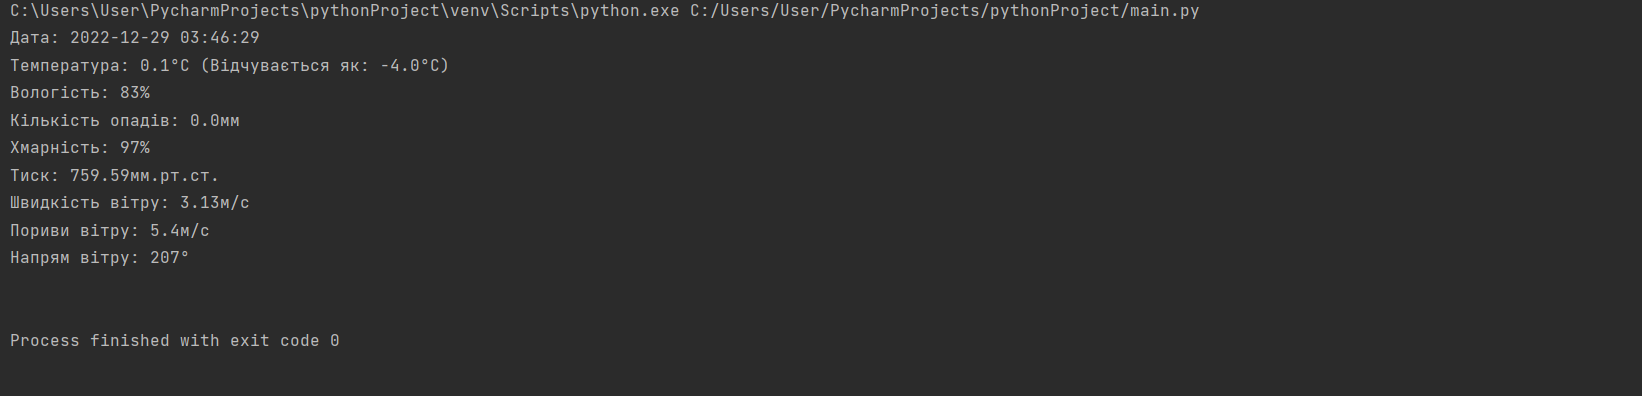

Визначимо прогноз погоди на 2022-12-28 на кожні 3 години запустивши функцію hourly_weather(latitude, longitude, date):

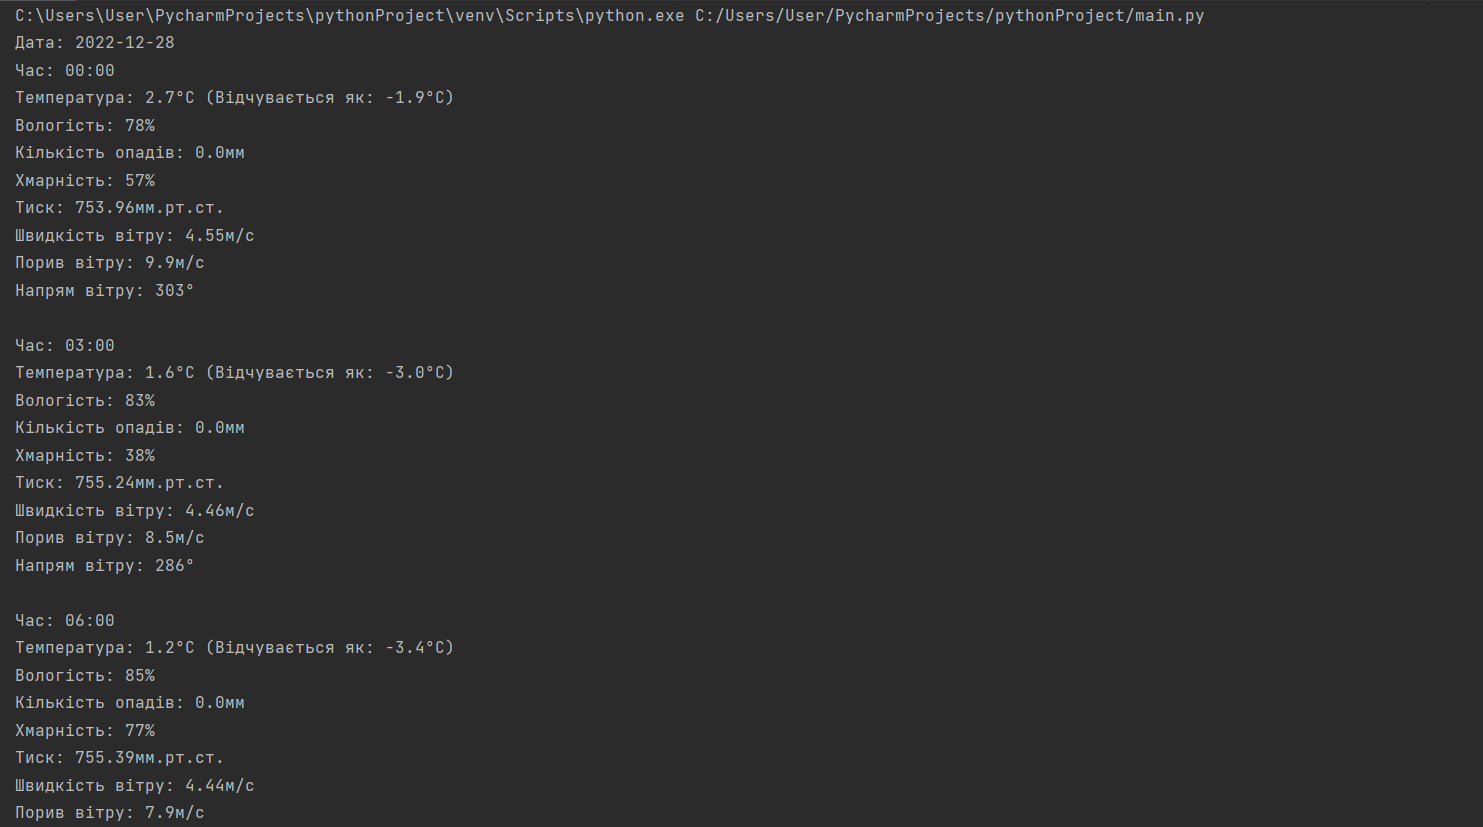

Таким же чином виводится прогноз погоди до 21:00.

Викличимо функцію week_weather(latitude, longitude, date), яка зробить прогноз погоди на неділю в якій є дата 2022-12-28:

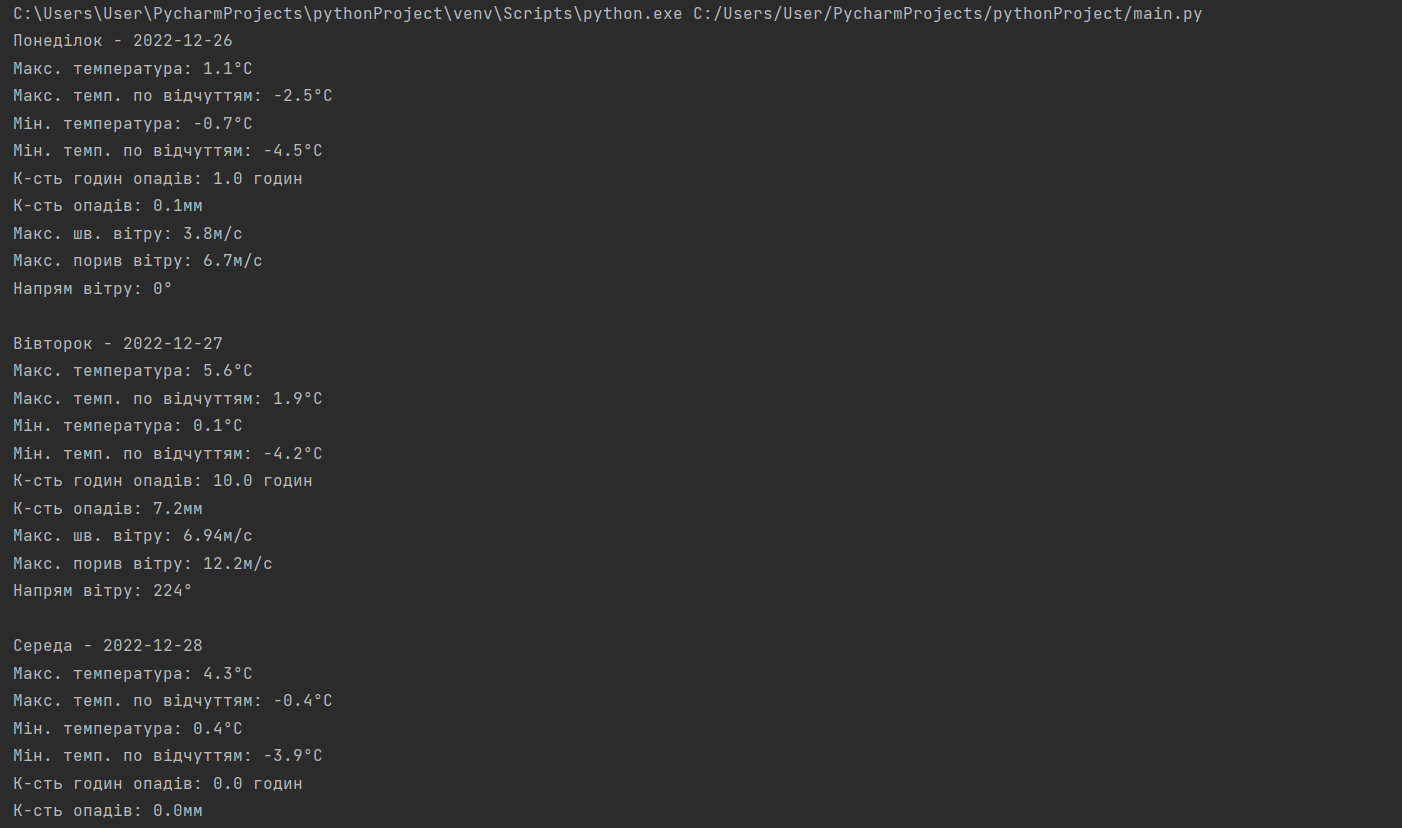

Таким же чином вираховується прогноз погоди і для інших днів тижня (до 2023-01-01 (неділя) включно)

Тепер викличимо функцію interval_weather(latitude, longitude, start_date, end_date) яка обрахує прогноз погоди починаючи з 2022-12-31 до 2023-01-07:

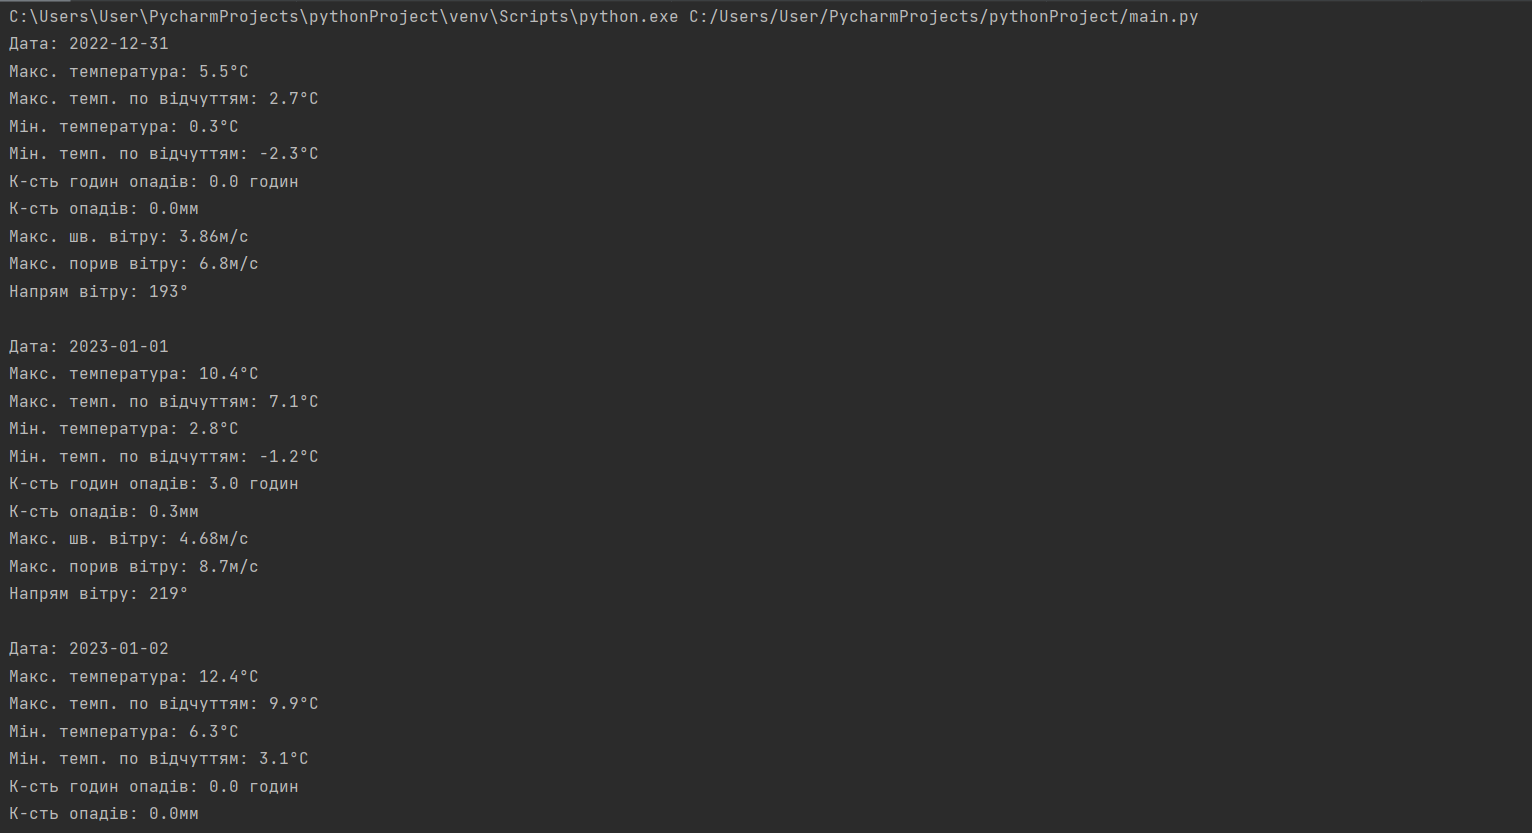

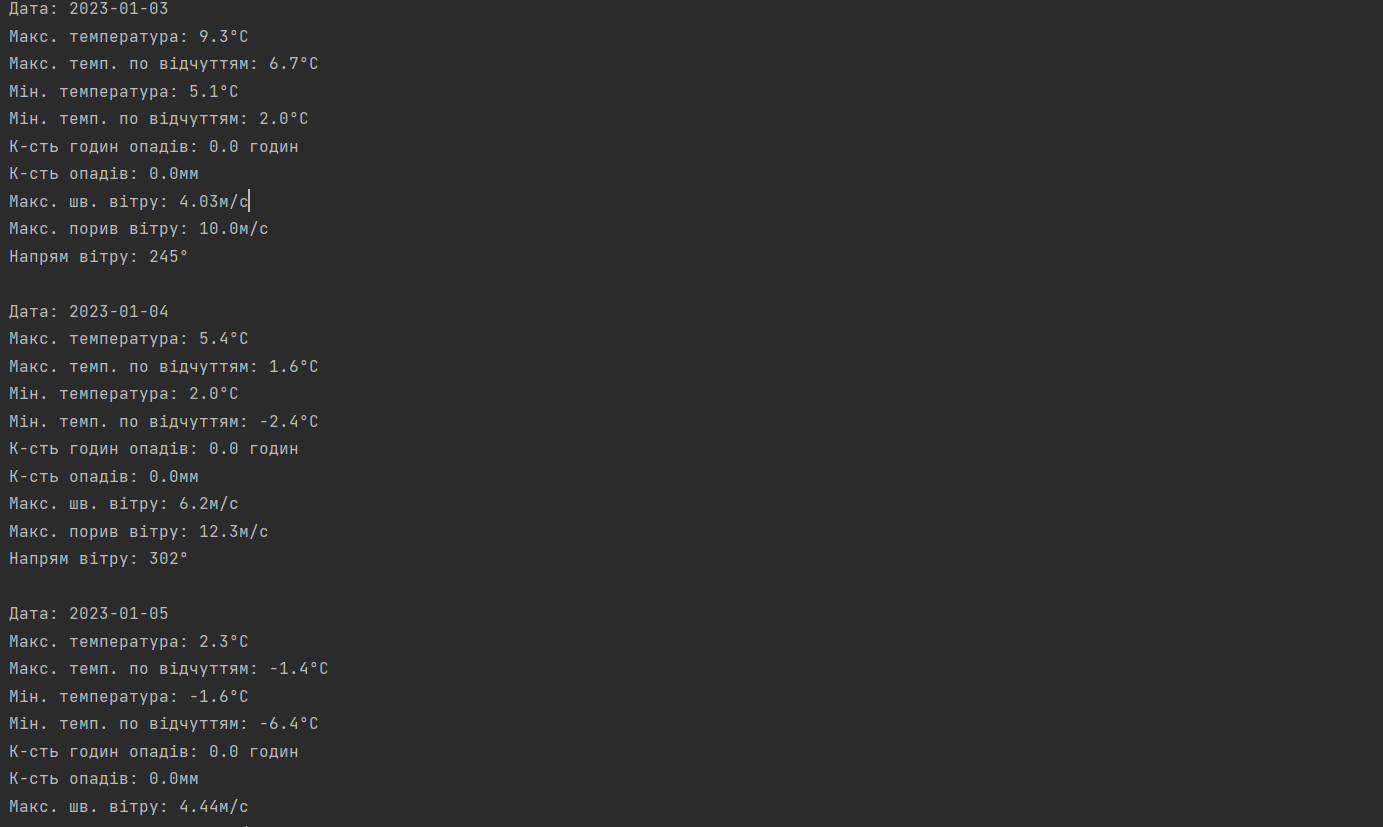

Таким чином прогноз зробився до 2023-01-07 (включно).

Функція hourly_interval_weather(latitude, longitude, start_date, end_date) виводить вже погодинний прогноз погоди на тому ж інтервалі.
В цей раз викличимо функцію export(hourly_interval_weather(latitude, longitude, start_date, end_date), 'weather_forecast.xlsx', 'forecast'), яка приймає на вхід минулу функцію hourly_interval_weather() та два інших параметра. На виході повині отримати ексель файл з назвою weather_forecast на сторінці під назвою forecast:

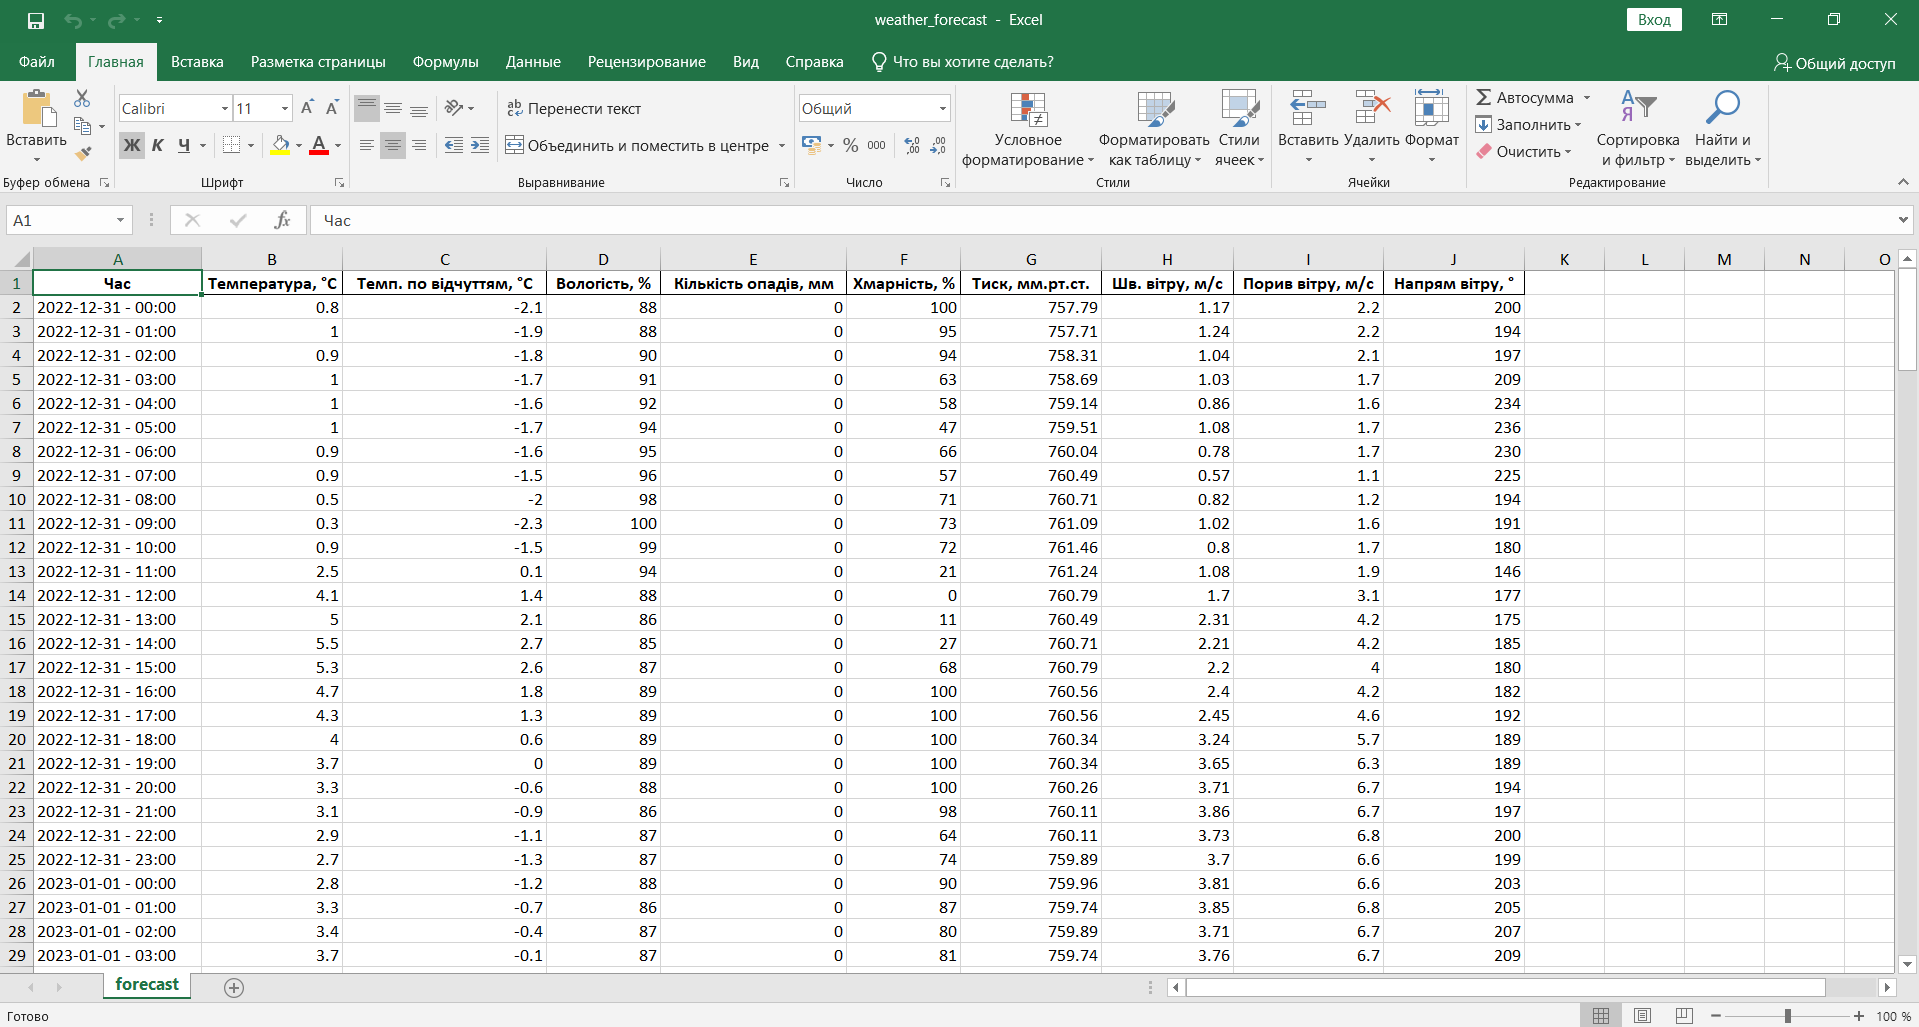

Викличимо функцію export() вже з передостанньою функцією, що залишилася: historical_interval_weather(), що виведе історію добових прогнозів починаючи від 2016-11-28, закінчуючи 2022-11-28:

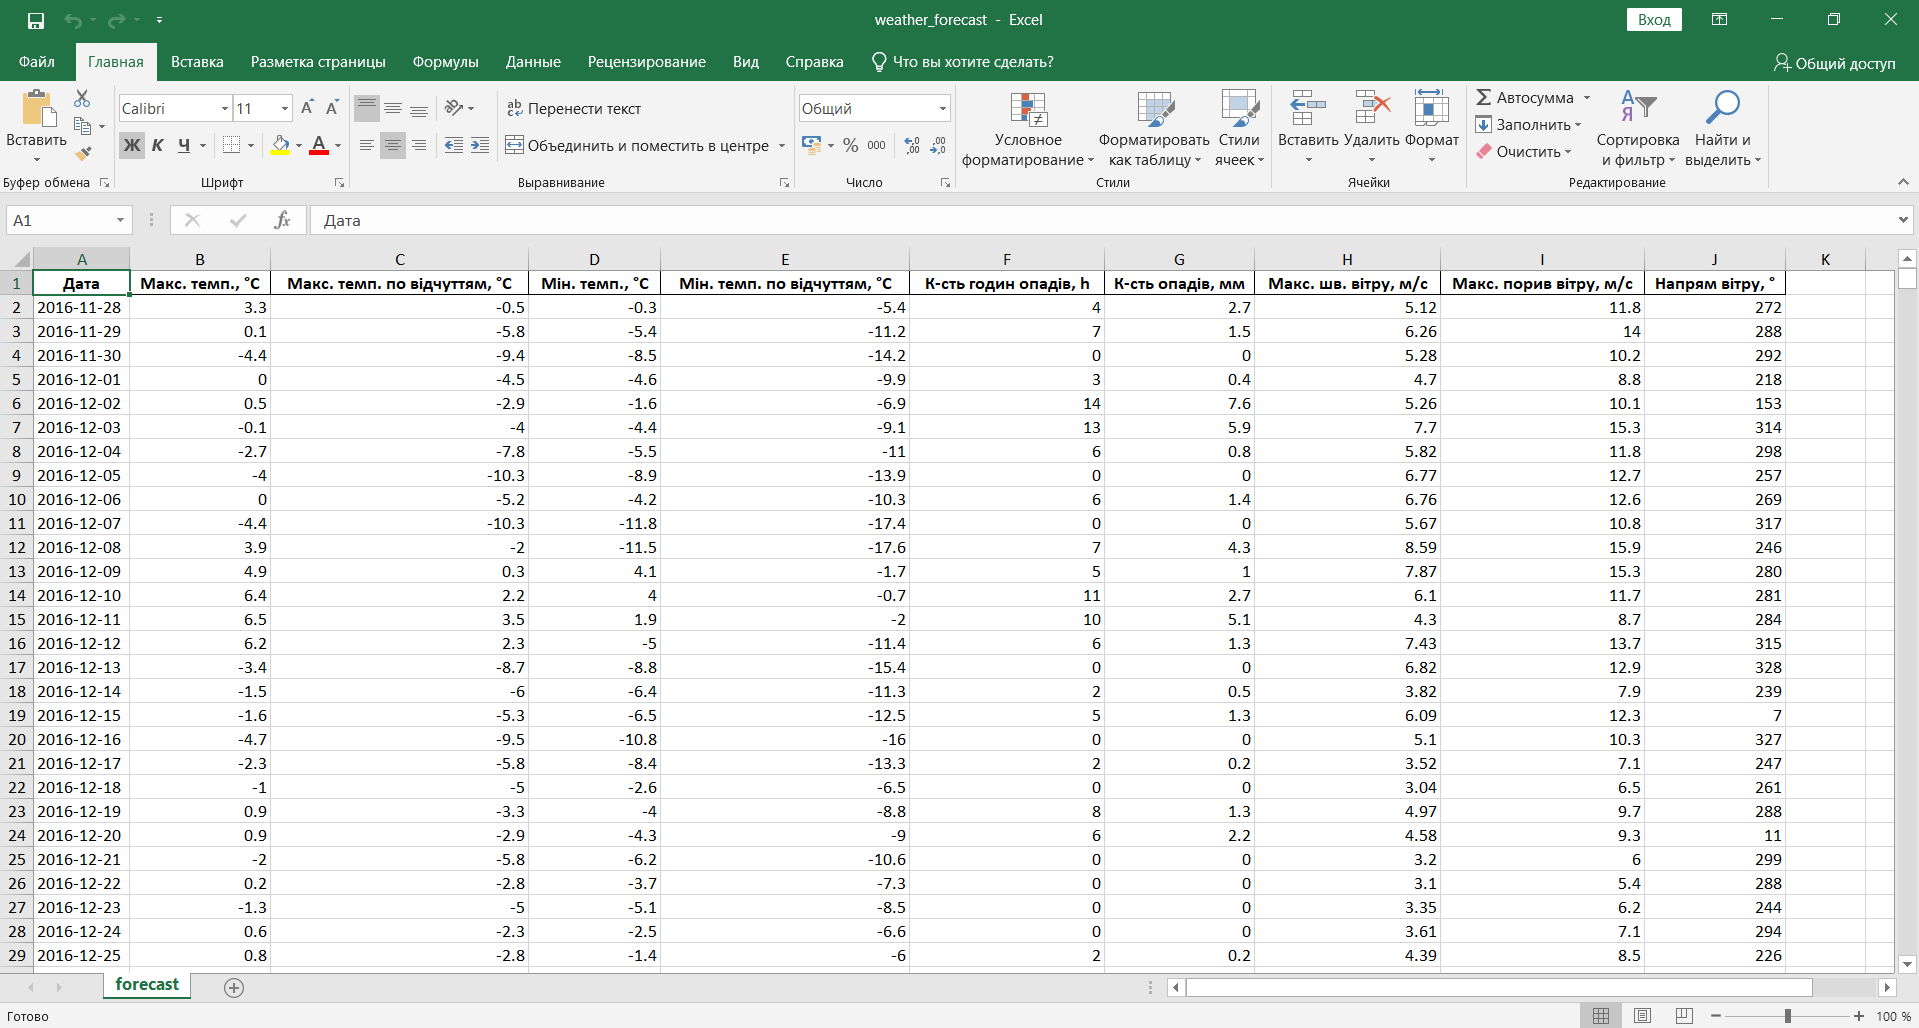

Викличимо останню функцію export(hourly_historical_interval_weather() як аргумент функції export() для того, щоб отримати історію погодинних прогнозів починаючи з 2016-11-28 до 2022-11-28:

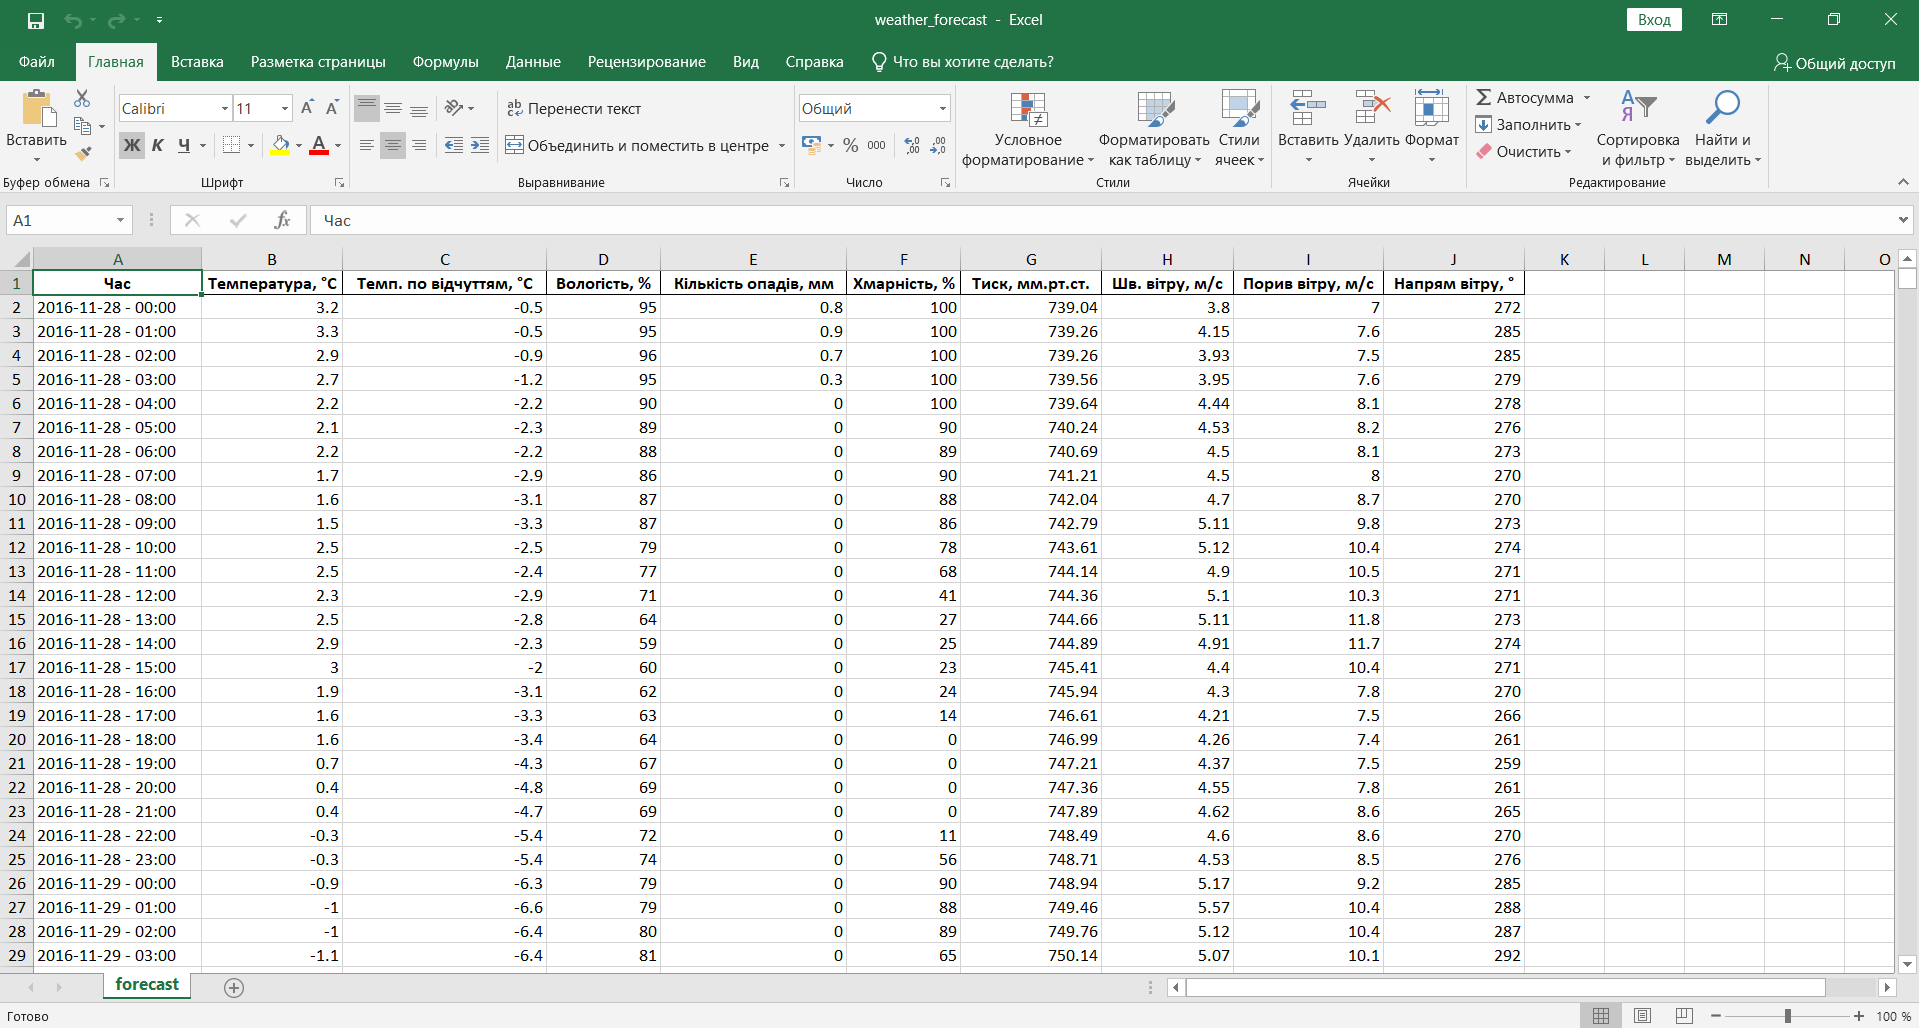